In [ ]:
!pip install numpy matplotlib scikit-learn scipy

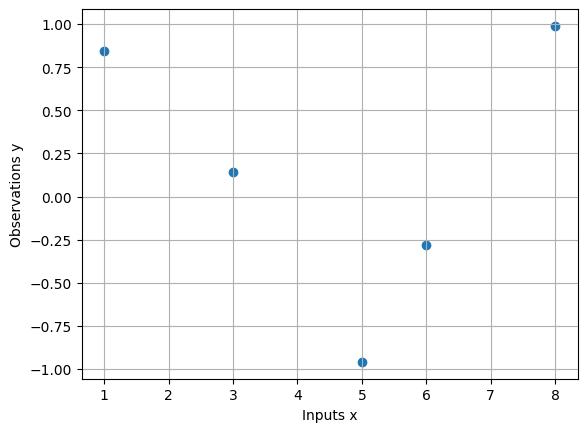

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Define the true function
def true_function(x):
    return np.sin(x)

X_train = np.array([[1], [3], [5], [6], [8]])
y_train = true_function(X_train).ravel()

# Plot the data
plt.scatter(X_train, y_train)
plt.xlabel('Inputs x')
plt.ylabel('Observations y')
plt.grid(True)
plt.show()


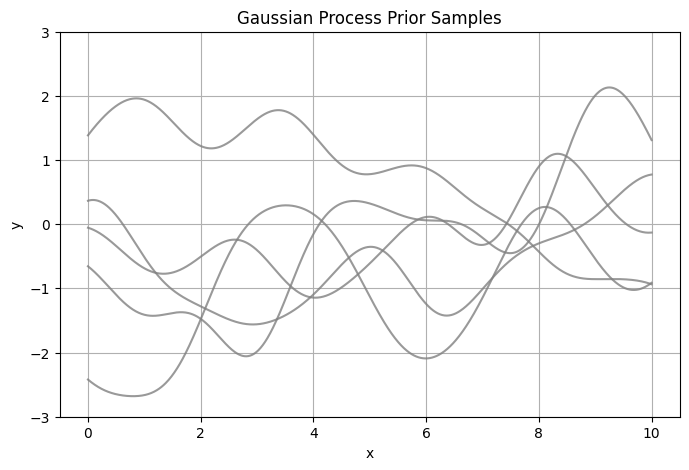

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# --- Define test input range
X_test = np.linspace(0, 10, 1000).reshape(-1, 1)

# --- Define the kernel (same as before)
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# --- Create a GP without fitting (i.e., prior)
gp_prior = GaussianProcessRegressor(kernel=kernel)

# --- Sample from the GP prior
n_samples = 5
y_samples = gp_prior.sample_y(X_test, n_samples=n_samples, random_state=0)

# --- Plotting
plt.figure(figsize=(8, 5))

for i in range(n_samples):
    plt.plot(X_test, y_samples[:, i], 'gray', linewidth=1.5, alpha=0.8)

plt.title('Gaussian Process Prior Samples')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-3, 3)
plt.grid(True)
plt.show()


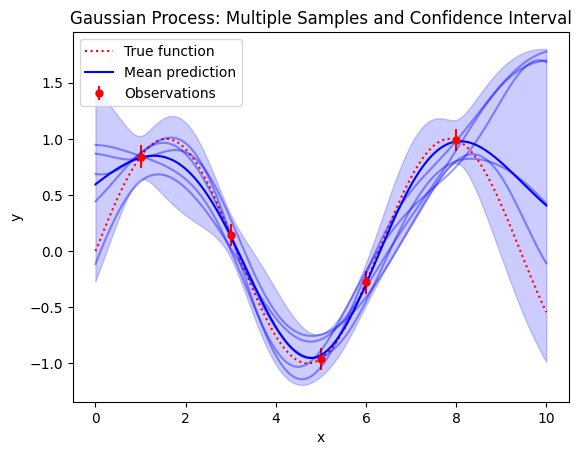

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define the true function
def true_function(x):
    return np.sin(x)

# Generate sample data
X_train = np.array([[1], [3], [5], [6], [8]])
y_train = true_function(X_train).ravel()

# Define the kernel: RBF kernel with constant term
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Create the GaussianProcessRegressor object
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)

# Fit to the training data
gp.fit(X_train, y_train)

# Generate test data
X_test = np.linspace(0, 10, 1000).reshape(-1, 1)

# Predict using the trained GP
y_pred, sigma = gp.predict(X_test, return_std=True)

# Plot the results
plt.figure()

# Plot the true function
plt.plot(X_test, true_function(X_test), 'r:', label='True function')

# Plot the observed data points
plt.errorbar(X_train, y_train, 0.1, fmt='r.', markersize=10, label='Observations')

# Plot the mean prediction
plt.plot(X_test, y_pred, 'b-', label='Mean prediction')

# Plot multiple samples from the GP to show variability
n_samples = 5  # Number of samples to draw
for i in range(n_samples):
    y_sample = gp.sample_y(X_test, random_state=i).ravel()  # Draw a sample from the GP
    plt.plot(X_test, y_sample, 'b-', alpha=0.4)  # Plot the sample with transparency

# Plot the confidence interval (95% confidence region)
plt.fill_between(X_test.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='blue')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Process: Multiple Samples and Confidence Interval')
plt.legend()
plt.show()

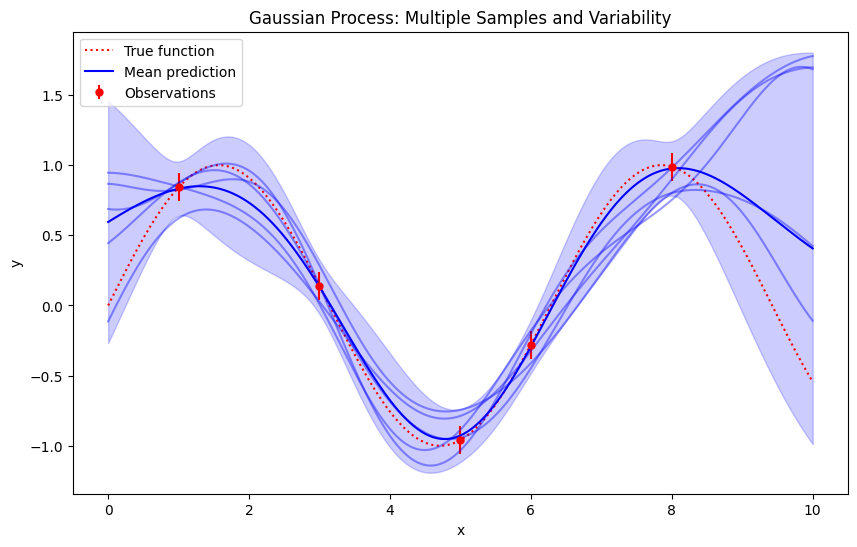

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define the true function
def true_function(x):
    return np.sin(x)

# Generate training data
X_train = np.array([[1], [3], [5], [6], [8]])
y_train = true_function(X_train).ravel()

# Define the kernel: RBF kernel with constant term
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Create the GaussianProcessRegressor object
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)

# Fit to the training data
gp.fit(X_train, y_train)

# Generate test data
X_test = np.linspace(0, 10, 1000).reshape(-1, 1)

# Predict using the trained GP, but we also want multiple samples
n_samples = 5  # Number of samples we want to draw

# Predict mean and standard deviation at test points
y_pred, sigma = gp.predict(X_test, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the true function
plt.plot(X_test, true_function(X_test), 'r:', label='True function')

# Plot the observed data
plt.errorbar(X_train, y_train, 0.1, fmt='r.', markersize=10, label='Observations')

# Plot multiple samples from the GP
for i in range(n_samples):
    y_sample = gp.sample_y(X_test, random_state=i).ravel()
    plt.plot(X_test, y_sample, 'b-', alpha=0.4)

# Plot the GP prediction and confidence interval
plt.plot(X_test, y_pred, 'b-', label='Mean prediction')
plt.fill_between(X_test.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Process: Multiple Samples and Variability')
plt.legend()
plt.show()


d:\HOC_TAP_IMP\Math Foundation\.venv\lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\HOC_TAP_IMP\Math Foundation\.venv\lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\HOC_TAP_IMP\Math Foundation\.venv\lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


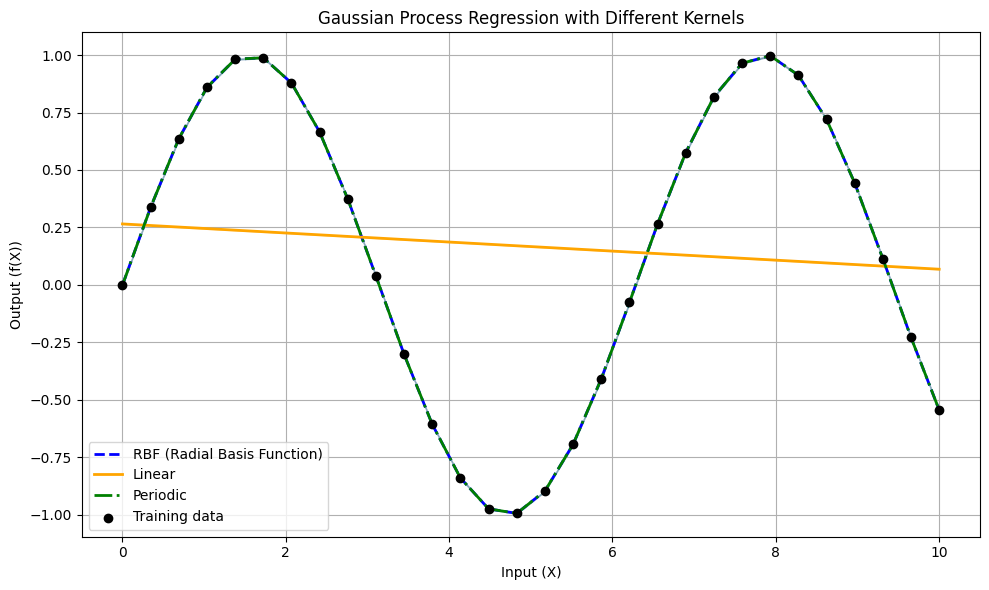

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, DotProduct, ExpSineSquared
from sklearn.gaussian_process import GaussianProcessRegressor

# Adjusted kernel parameters for visibility
kernels = {
    "RBF (Radial Basis Function)": C(1.0) * RBF(length_scale=0.05),  # More variation, smoother spread
    "Linear": C(1.0) * DotProduct(),
    "Periodic": C(1.0) * ExpSineSquared(length_scale=1.0, periodicity=1.5)
}

X = np.linspace(0, 10, 30).reshape(-1, 1)
y = np.sin(X).ravel()

plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green']
linestyles = ['--', '-', '-.']  # RBF as dashed

for (label, kernel), color, ls in zip(kernels.items(), colors, linestyles):
    gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-6)
    gp.fit(X, y)
    y_mean, y_std = gp.predict(X, return_std=True)

    plt.plot(X, y_mean, label=label, color=color, linestyle=ls, linewidth=2)
    plt.fill_between(X.flatten(), y_mean - 1.96 * y_std, y_mean + 1.96 * y_std,
                     alpha=0.2, color=color)

# Training data
plt.scatter(X, y, c='black', label='Training data', zorder=5)

plt.title('Gaussian Process Regression with Different Kernels')
plt.xlabel('Input (X)')
plt.ylabel('Output (f(X))')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


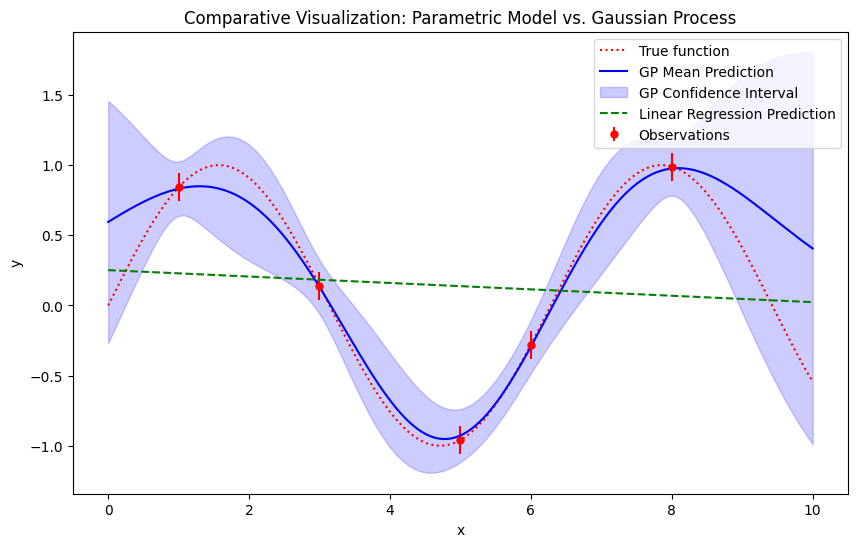

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.linear_model import LinearRegression

# Define the true function
def true_function(x):
    return np.sin(x)

# Generate sample data
X_train = np.array([[1], [3], [5], [6], [8]])
y_train = true_function(X_train).ravel()

# Define the kernel: RBF kernel with constant term (for GP)
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Create the GaussianProcessRegressor object for GP
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)

# Fit to the training data
gp.fit(X_train, y_train)

# Generate test data for prediction
X_test = np.linspace(0, 10, 1000).reshape(-1, 1)

# Predict using the trained GP
y_pred_gp, sigma_gp = gp.predict(X_test, return_std=True)

# Fit a parametric model (Linear Regression)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the true function
plt.plot(X_test, true_function(X_test), 'r:', label='True function')

# Plot the observed data points
plt.errorbar(X_train, y_train, 0.1, fmt='r.', markersize=10, label='Observations')

# Plot the GP prediction and confidence interval (uncertainty)
plt.plot(X_test, y_pred_gp, 'b-', label='GP Mean Prediction')
plt.fill_between(X_test.ravel(), y_pred_gp - 1.96 * sigma_gp, y_pred_gp + 1.96 * sigma_gp, alpha=0.2, color='blue', label='GP Confidence Interval')

# Plot the Linear Regression prediction
plt.plot(X_test, y_pred_lr, 'g--', label='Linear Regression Prediction')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparative Visualization: Parametric Model vs. Gaussian Process')
plt.legend()
plt.show()


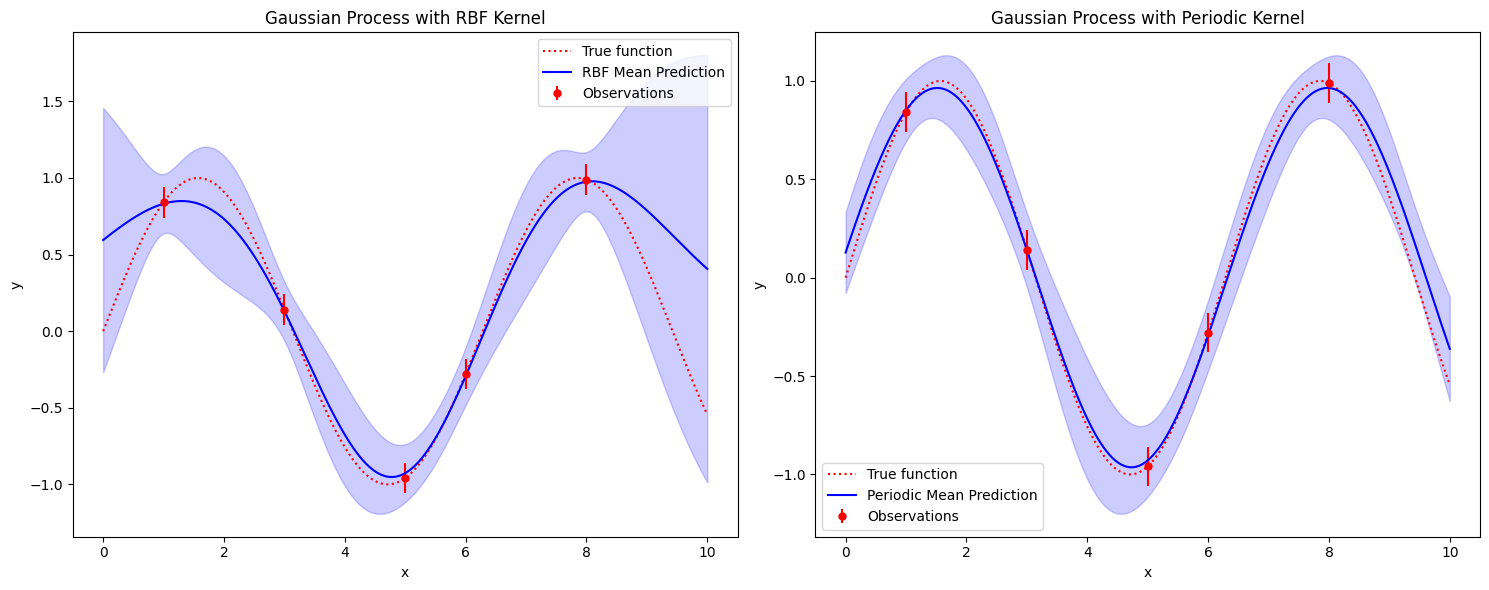

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, ExpSineSquared

# Define the true function
def true_function(x):
    return np.sin(x)

# Generate training data
X_train = np.array([[1], [3], [5], [6], [8]])
y_train = true_function(X_train).ravel()

# Generate test data
X_test = np.linspace(0, 10, 1000).reshape(-1, 1)

# Create a figure for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define the RBF kernel (Radial Basis Function)
kernel_rbf = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Define the Periodic kernel using ExpSineSquared
kernel_periodic = C(1.0, (1e-4, 1e1)) * ExpSineSquared(length_scale=1.0, periodicity=3.0)

# Create GaussianProcessRegressor objects
gp_rbf = GaussianProcessRegressor(kernel=kernel_rbf, n_restarts_optimizer=10, alpha=1e-2)
gp_periodic = GaussianProcessRegressor(kernel=kernel_periodic, n_restarts_optimizer=10, alpha=1e-2)

# Fit to the training data
gp_rbf.fit(X_train, y_train)
gp_periodic.fit(X_train, y_train)

# Predict using the trained GPs
y_pred_rbf, sigma_rbf = gp_rbf.predict(X_test, return_std=True)
y_pred_periodic, sigma_periodic = gp_periodic.predict(X_test, return_std=True)

# Plot results for RBF kernel (left plot)
axes[0].plot(X_test, true_function(X_test), 'r:', label='True function')
axes[0].errorbar(X_train, y_train, 0.1, fmt='r.', markersize=10, label='Observations')
axes[0].plot(X_test, y_pred_rbf, 'b-', label='RBF Mean Prediction')
axes[0].fill_between(X_test.ravel(), y_pred_rbf - 1.96 * sigma_rbf, y_pred_rbf + 1.96 * sigma_rbf, alpha=0.2, color='blue')
axes[0].set_title('Gaussian Process with RBF Kernel')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()

# Plot results for Periodic kernel (right plot)
axes[1].plot(X_test, true_function(X_test), 'r:', label='True function')
axes[1].errorbar(X_train, y_train, 0.1, fmt='r.', markersize=10, label='Observations')
axes[1].plot(X_test, y_pred_periodic, 'b-', label='Periodic Mean Prediction')
axes[1].fill_between(X_test.ravel(), y_pred_periodic - 1.96 * sigma_periodic, y_pred_periodic + 1.96 * sigma_periodic, alpha=0.2, color='blue')
axes[1].set_title('Gaussian Process with Periodic Kernel')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()

plt.tight_layout()
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with linear trend
n_samples = 200

# Method 1: Generate 2D data with strong linear correlation
# Create the main trend
x1 = np.random.normal(0, 1, n_samples)
# Create y with strong linear relationship to x + some noise
x2 = 2 * x1 + 0.5 * np.random.normal(0, 1, n_samples)

# Combine into dataset
data_2d = np.column_stack([x1, x2])

print("Generated 2D data with linear trend")
print(f"Data shape: {data_2d.shape}")
print(f"Correlation between features: {np.corrcoef(data_2d.T)[0,1]:.3f}")

# Method 2: Generate 3D data with underlying 2D linear structure
# Create base 2D data with linear trend
base_x = np.random.normal(0, 2, n_samples)
base_y = np.random.normal(0, 2, n_samples)

# Create 3D data where third dimension is linear combination of first two
x3d_1 = base_x
x3d_2 = base_y  
x3d_3 = 0.8 * base_x + 0.6 * base_y + 0.2 * np.random.normal(0, 1, n_samples)

data_3d = np.column_stack([x3d_1, x3d_2, x3d_3])

print(f"\nGenerated 3D data with underlying linear structure")
print(f"Data shape: {data_3d.shape}")

# Apply PCA to 2D data
pca_2d = PCA()
data_2d_transformed = pca_2d.fit_transform(data_2d)

print(f"\n=== PCA Results for 2D Data ===")
print(f"Explained variance ratio: {pca_2d.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca_2d.explained_variance_ratio_)}")
print(f"Principal components (eigenvectors):")
print(pca_2d.components_)

# Apply PCA to 3D data
pca_3d = PCA()
data_3d_transformed = pca_3d.fit_transform(data_3d)

print(f"\n=== PCA Results for 3D Data ===")
print(f"Explained variance ratio: {pca_3d.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca_3d.explained_variance_ratio_)}")
print(f"Principal components (eigenvectors):")
print(pca_3d.components_)


Generated 2D data with linear trend
Data shape: (200, 2)
Correlation between features: 0.968

Generated 3D data with underlying linear structure
Data shape: (200, 3)

=== PCA Results for 2D Data ===
Explained variance ratio: [0.99064997 0.00935003]
Cumulative explained variance: [0.99064997 1.        ]
Principal components (eigenvectors):
[[ 0.4199271   0.90755784]
 [ 0.90755784 -0.4199271 ]]

=== PCA Results for 3D Data ===
Explained variance ratio: [0.71081337 0.28780486 0.00138178]
Cumulative explained variance: [0.71081337 0.99861822 1.        ]
Principal components (eigenvectors):
[[ 0.52171688  0.47149318  0.71098922]
 [-0.63963038  0.76765586 -0.03971725]
 [-0.56452145 -0.43404915  0.70208038]]


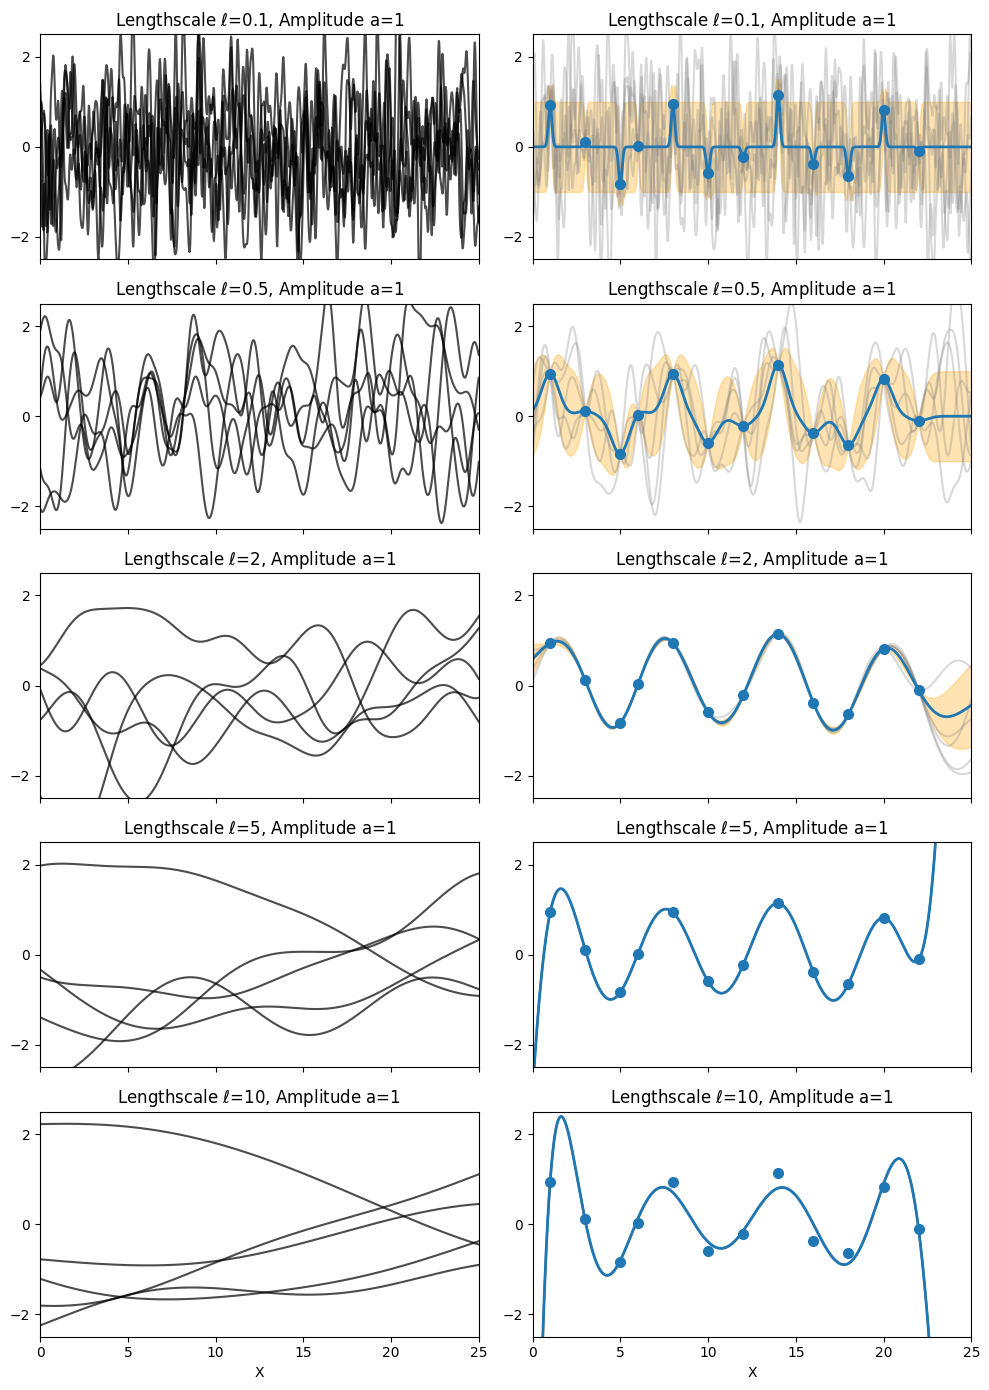

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(42)

# Tập dữ liệu huấn luyện ví dụ
X_train = np.array([[1], [3], [5], [6], [8], [10], [12], [14], [16], [18], [20], [22]])
y_train = np.sin(X_train).ravel() + np.random.normal(0, 0.2, X_train.shape[0])

# Tập test
X = np.linspace(0, 25, 1000).reshape(-1, 1)

# Các giá trị lengthscale cần hiển thị
lengthscales = [0.1, 0.5, 2, 5, 10]

# Khởi tạo figure 5x2
fig, axes = plt.subplots(len(lengthscales), 2, figsize=(10, 2.8 * len(lengthscales)))
plt.subplots_adjust(hspace=0.28, wspace=0.15)

for i, l in enumerate(lengthscales):
    # --- PRIOR: Sample từ GP (chưa fit data)
    kernel = C(1.0, constant_value_bounds="fixed") * RBF(length_scale=l, length_scale_bounds="fixed")
    gp_prior = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, normalize_y=False)
    y_prior = gp_prior.sample_y(X, 5, random_state=0)
    ax_prior = axes[i, 0]
    ax_prior.plot(X, y_prior, color='k', alpha=0.7)
    ax_prior.set_title(f'Lengthscale $\\ell$={l}, Amplitude a=1')
    ax_prior.set_xlim(0, 25)
    ax_prior.set_ylim(-2.5, 2.5)
    if i < len(lengthscales)-1:
        ax_prior.set_xticklabels([])
    ax_prior.set_yticks([-2, 0, 2])

    # --- POSTERIOR: Fit với data, plot mean, CI, sample
    gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, normalize_y=False)
    gp.fit(X_train, y_train)
    y_mean, y_std = gp.predict(X, return_std=True)
    y_post = gp.sample_y(X, 5, random_state=0)
    ax_post = axes[i, 1]
    ax_post.plot(X, y_post, color='gray', alpha=0.3)
    ax_post.plot(X, y_mean, color='C0', linewidth=2)
    ax_post.fill_between(X.flatten(), y_mean - y_std, y_mean + y_std, color='orange', alpha=0.3)
    ax_post.plot(X_train, y_train, 'o', color='C0', markersize=7)
    ax_post.set_title(f'Lengthscale $\\ell$={l}, Amplitude a=1')
    ax_post.set_xlim(0, 25)
    ax_post.set_ylim(-2.5, 2.5)
    if i < len(lengthscales)-1:
        ax_post.set_xticklabels([])
    ax_post.set_yticks([-2, 0, 2])

axes[-1, 0].set_xlabel('X')
axes[-1, 1].set_xlabel('X')
plt.tight_layout()
plt.show()


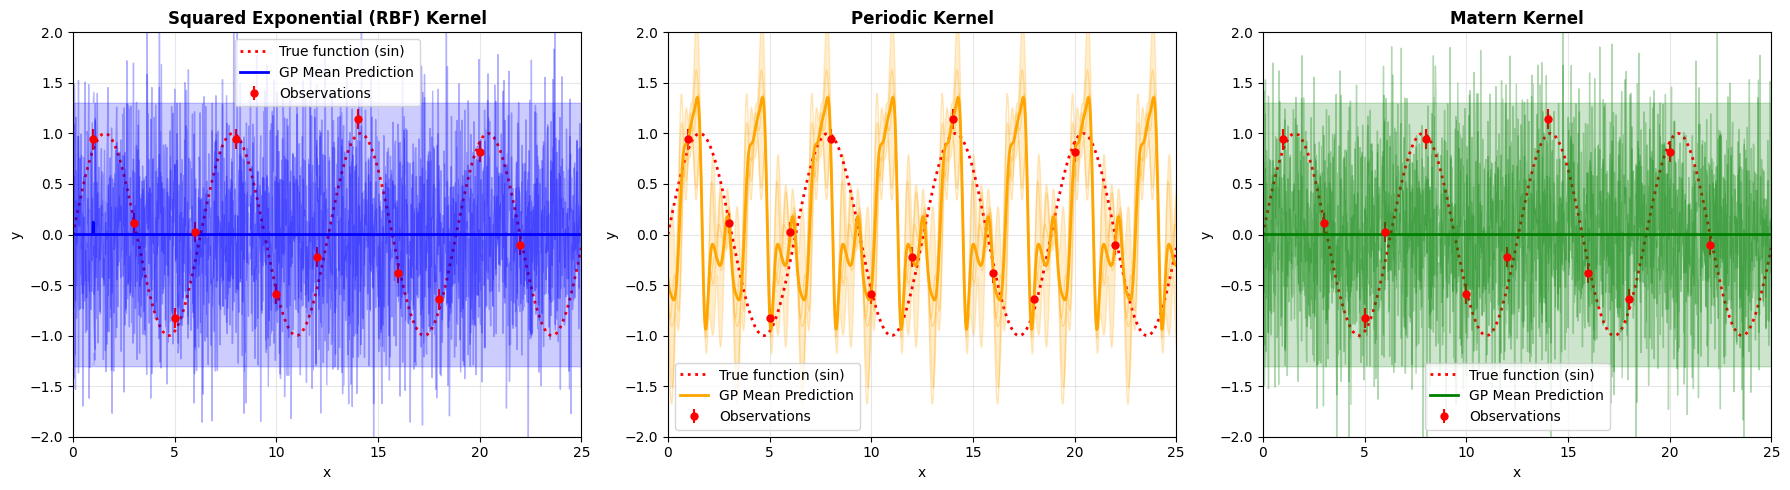

=== Kernel Information ===

Squared Exponential (RBF):
  Kernel: 1**2 * RBF(length_scale=1)
  Parameters: {'k1': 1**2, 'k2': RBF(length_scale=1), 'k1__constant_value': 1.0, 'k1__constant_value_bounds': (0.0001, 10.0), 'k2__length_scale': 1.0, 'k2__length_scale_bounds': (0.0001, 10.0)}

Periodic:
  Kernel: 1**2 * ExpSineSquared(length_scale=1, periodicity=3)
  Parameters: {'k1': 1**2, 'k2': ExpSineSquared(length_scale=1, periodicity=3), 'k1__constant_value': 1.0, 'k1__constant_value_bounds': (0.0001, 10.0), 'k2__length_scale': 1.0, 'k2__periodicity': 3.0, 'k2__length_scale_bounds': (0.0001, 10.0), 'k2__periodicity_bounds': (1e-05, 100000.0)}

Matern:
  Kernel: 1**2 * Matern(length_scale=1, nu=1.5)
  Parameters: {'k1': 1**2, 'k2': Matern(length_scale=1, nu=1.5), 'k1__constant_value': 1.0, 'k1__constant_value_bounds': (0.0001, 10.0), 'k2__length_scale': 1.0, 'k2__length_scale_bounds': (0.0001, 10.0), 'k2__nu': 1.5}

=== Kernel Behavior Comparison ===


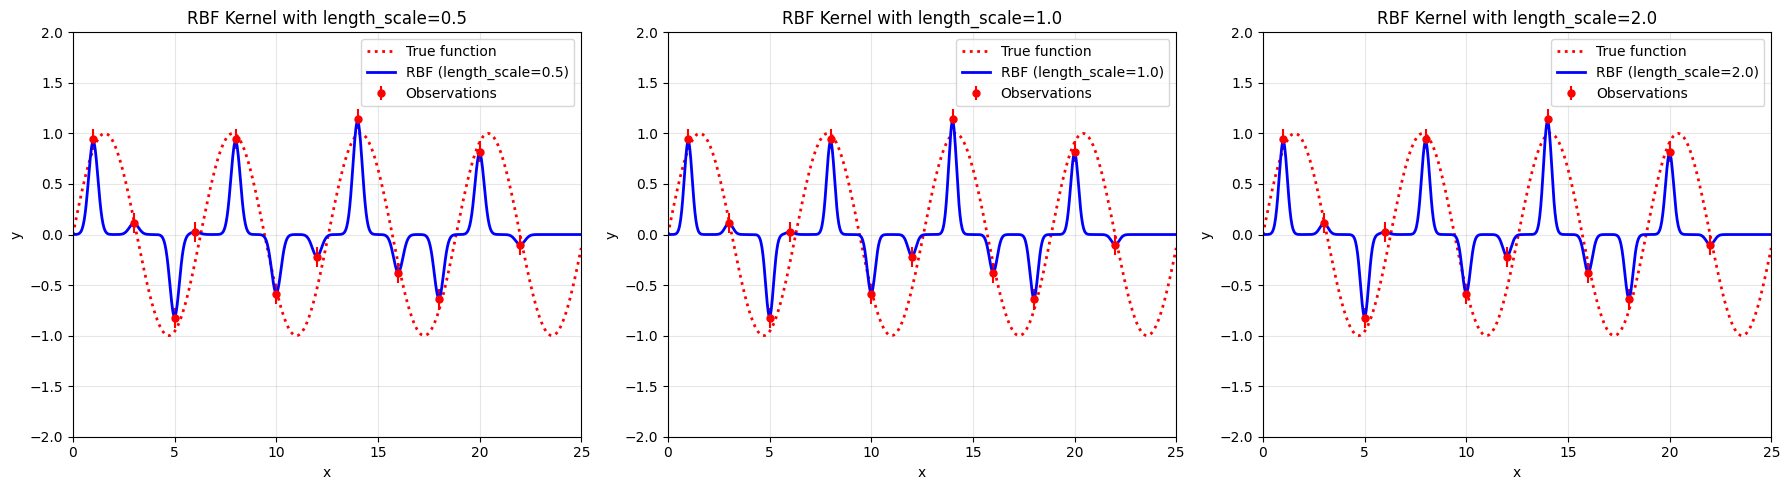

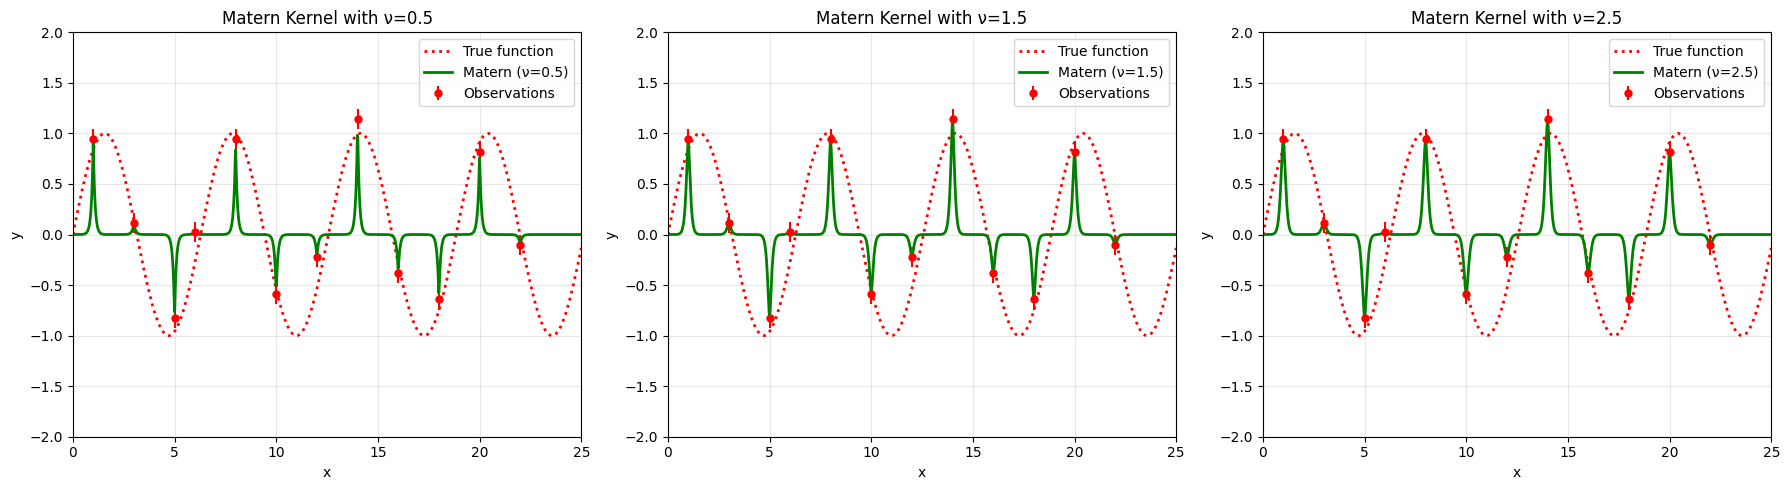


=== Summary ===
1. RBF Kernel: Smooth, infinitely differentiable functions
2. Periodic Kernel: Captures periodic patterns in data
3. Matern Kernel: More flexible smoothness control with ν parameter
   - ν=0.5: Very rough, non-differentiable
   - ν=1.5: Once differentiable
   - ν=2.5: Twice differentiable


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, Matern, ConstantKernel as C

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
X_train = np.array([[1], [3], [5], [6], [8], [10], [12], [14], [16], [18], [20], [22]])
y_train = np.sin(X_train).ravel() + np.random.normal(0, 0.2, X_train.shape[0])

# Generate test data for prediction
X_test = np.linspace(0, 25, 1000).reshape(-1, 1)

# Define the three kernels
kernels = {
    "Squared Exponential (RBF)": C(1.0, (1e-4, 1e1)) * RBF(length_scale=1.0, length_scale_bounds=(1e-4, 1e1)),
    "Periodic": C(1.0, (1e-4, 1e1)) * ExpSineSquared(length_scale=1.0, periodicity=3.0, length_scale_bounds=(1e-4, 1e1)),
    "Matern": C(1.0, (1e-4, 1e1)) * Matern(length_scale=1.0, nu=1.5, length_scale_bounds=(1e-4, 1e1))
}

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Colors for different plots
colors = ['blue', 'orange', 'green']

for i, (kernel_name, kernel) in enumerate(kernels.items()):
    # Create Gaussian Process with the kernel
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
    
    # Fit to the training data
    gp.fit(X_train, y_train)
    
    # Predict using the trained GP
    y_pred, sigma = gp.predict(X_test, return_std=True)
    
    # Plot the results
    ax = axes[i]
    
    # Plot the true function (sine wave)
    ax.plot(X_test, np.sin(X_test), 'r:', label='True function (sin)', linewidth=2)
    
    # Plot the observed data points
    ax.errorbar(X_train, y_train, 0.1, fmt='r.', markersize=10, label='Observations')
    
    # Plot the mean prediction
    ax.plot(X_test, y_pred, color=colors[i], linewidth=2, label='GP Mean Prediction')
    
    # Plot multiple samples from the GP
    n_samples = 3
    for j in range(n_samples):
        y_sample = gp.sample_y(X_test, random_state=j).ravel()
        ax.plot(X_test, y_sample, color=colors[i], alpha=0.3, linewidth=1)
    
    # Plot the confidence interval (95% confidence region)
    ax.fill_between(X_test.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, 
                   alpha=0.2, color=colors[i])
    
    # Add labels and title
    ax.set_title(f'{kernel_name} Kernel', fontsize=12, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 25)
    ax.set_ylim(-2, 2)

plt.tight_layout()
plt.show()

# Print kernel information
print("=== Kernel Information ===")
for kernel_name, kernel in kernels.items():
    print(f"\n{kernel_name}:")
    print(f"  Kernel: {kernel}")
    print(f"  Parameters: {kernel.get_params()}")

# Demonstrate kernel behavior with different parameters
print("\n=== Kernel Behavior Comparison ===")

# Test with different length scales for RBF
length_scales = [0.5, 1.0, 2.0]
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 5))

for i, ls in enumerate(length_scales):
    kernel_rbf = C(1.0) * RBF(length_scale=ls)
    gp_rbf = GaussianProcessRegressor(kernel=kernel_rbf, alpha=1e-2)
    gp_rbf.fit(X_train, y_train)
    y_pred_rbf, _ = gp_rbf.predict(X_test, return_std=True)
    
    axes2[i].plot(X_test, np.sin(X_test), 'r:', label='True function', linewidth=2)
    axes2[i].errorbar(X_train, y_train, 0.1, fmt='r.', markersize=10, label='Observations')
    axes2[i].plot(X_test, y_pred_rbf, 'b-', linewidth=2, label=f'RBF (length_scale={ls})')
    axes2[i].set_title(f'RBF Kernel with length_scale={ls}')
    axes2[i].set_xlabel('x')
    axes2[i].set_ylabel('y')
    axes2[i].legend()
    axes2[i].grid(True, alpha=0.3)
    axes2[i].set_xlim(0, 25)
    axes2[i].set_ylim(-2, 2)

plt.tight_layout()
plt.show()

# Compare Matern kernels with different nu values
nu_values = [0.5, 1.5, 2.5]
fig3, axes3 = plt.subplots(1, 3, figsize=(18, 5))

for i, nu in enumerate(nu_values):
    kernel_matern = C(1.0) * Matern(length_scale=1.0, nu=nu)
    gp_matern = GaussianProcessRegressor(kernel=kernel_matern, alpha=1e-2)
    gp_matern.fit(X_train, y_train)
    y_pred_matern, _ = gp_matern.predict(X_test, return_std=True)
    
    axes3[i].plot(X_test, np.sin(X_test), 'r:', label='True function', linewidth=2)
    axes3[i].errorbar(X_train, y_train, 0.1, fmt='r.', markersize=10, label='Observations')
    axes3[i].plot(X_test, y_pred_matern, 'g-', linewidth=2, label=f'Matern (ν={nu})')
    axes3[i].set_title(f'Matern Kernel with ν={nu}')
    axes3[i].set_xlabel('x')
    axes3[i].set_ylabel('y')
    axes3[i].legend()
    axes3[i].grid(True, alpha=0.3)
    axes3[i].set_xlim(0, 25)
    axes3[i].set_ylim(-2, 2)

plt.tight_layout()
plt.show()

print("\n=== Summary ===")
print("1. RBF Kernel: Smooth, infinitely differentiable functions")
print("2. Periodic Kernel: Captures periodic patterns in data")
print("3. Matern Kernel: More flexible smoothness control with ν parameter")
print("   - ν=0.5: Very rough, non-differentiable")
print("   - ν=1.5: Once differentiable")
print("   - ν=2.5: Twice differentiable")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Simple Linear GP: f(x) = w0 + w1*x, where w0, w1 ~ N(0, 1)
def simple_linear_gp():
    # Define x range
    x = np.linspace(-5, 5, 100)
    
    # Create single figure
    plt.figure(figsize=(8, 6))
    
    # Sample multiple linear functions from the prior
    n_samples = 10
    w_samples = np.random.normal(0, 1, (n_samples, 2))  # [w0, w1] pairs
    
    # Plot each linear function
    for i in range(n_samples):
        w0, w1 = w_samples[i]
        y = w0 + w1 * x
        plt.plot(x, y, linewidth=2, alpha=0.8)
    
    # Add confidence region (theoretical bounds for 95% of functions)
    # For linear GP, the bounds grow with |x|
    x_fill = np.linspace(-5, 5, 100)
    # Approximate 95% bounds: roughly 2*sqrt(1 + x^2) for this setup
    upper_bound = 2 * np.sqrt(1 + x_fill**2)
    lower_bound = -2 * np.sqrt(1 + x_fill**2)
    plt.fill_between(x_fill, lower_bound, upper_bound, alpha=0.2, color='lightblue')
    
    plt.xlim(-5, 5)
    plt.ylim(-10, 10)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('f(x)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Run the simple demonstration
simple_linear_gp()

print("Linear GP: f(x) = w₀ + w₁x where w₀, w₁ ~ N(0,1)")
print("Each colored line represents one sample from the prior distribution")
print("The light blue region shows the approximate 95% confidence bounds")


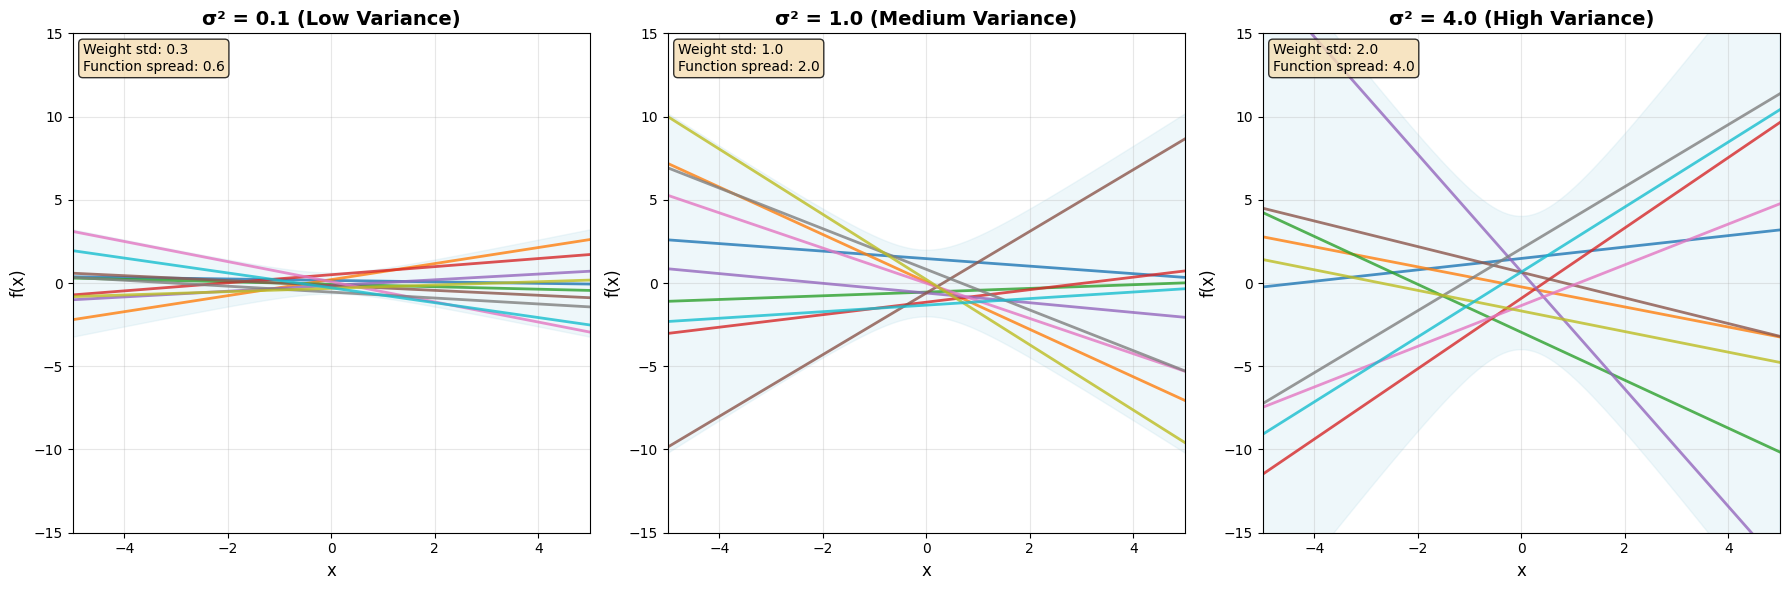

=== Hyperparameter Effects: Variance σ² ===
Linear GP: f(x) = w₀ + w₁x where w₀, w₁ ~ N(0, σ²)

Key Observations:
1. LOW VARIANCE (σ² = 0.1):
   - Functions stay close to zero
   - Small slopes and intercepts
   - Tight confidence bounds
   - Low variability in function shapes

2. MEDIUM VARIANCE (σ² = 1.0):
   - Moderate function variability
   - Balanced spread of slopes and intercepts
   - Medium confidence bounds

3. HIGH VARIANCE (σ² = 4.0):
   - Functions spread widely
   - Large slopes and intercepts possible
   - Wide confidence bounds
   - High variability in function shapes

=== Mathematical Relationship ===
• Weight distribution: w ~ N(0, σ²I)
• Function values: f(x) = w₀ + w₁x
• Variance at point x: Var[f(x)] = σ²(1 + x²)
• Standard deviation grows with |x| and σ
• Larger σ² → more diverse function samples


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Linear GP with different variance hyperparameters
def linear_gp_variance_comparison():
    # Define x range
    x = np.linspace(-5, 5, 100)
    
    # Different variance values to compare
    variances = [0.1, 1.0, 4.0]
    variance_labels = ['σ² = 0.1 (Low Variance)', 'σ² = 1.0 (Medium Variance)', 'σ² = 4.0 (High Variance)']
    
    # Create figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Number of function samples to draw
    n_samples = 10
    
    for idx, (var, label) in enumerate(zip(variances, variance_labels)):
        ax = axes[idx]
        
        # Sample weights from N(0, σ²I) instead of N(0, I)
        w_samples = np.random.normal(0, np.sqrt(var), (n_samples, 2))  # [w0, w1] pairs
        
        # Plot each linear function
        for i in range(n_samples):
            w0, w1 = w_samples[i]
            y = w0 + w1 * x
            ax.plot(x, y, linewidth=2, alpha=0.8)
        
        # Add confidence region
        # For linear GP with variance σ², bounds scale with σ
        sigma = np.sqrt(var)
        upper_bound = 2 * sigma * np.sqrt(1 + x**2)
        lower_bound = -2 * sigma * np.sqrt(1 + x**2)
        ax.fill_between(x, lower_bound, upper_bound, alpha=0.2, color='lightblue')
        
        # Set common y-limits for comparison
        ax.set_xlim(-5, 5)
        ax.set_ylim(-15, 15)
        ax.set_xlabel('x', fontsize=12)
        ax.set_ylabel('f(x)', fontsize=12)
        ax.set_title(label, fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        # Add text box with statistics
        textstr = f'Weight std: {np.sqrt(var):.1f}\nFunction spread: {2*np.sqrt(var):.1f}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
        ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.show()
    
    return variances

# Run the variance comparison
variances_used = linear_gp_variance_comparison()

print("=== Hyperparameter Effects: Variance σ² ===")
print("Linear GP: f(x) = w₀ + w₁x where w₀, w₁ ~ N(0, σ²)")
print("\nKey Observations:")
print("1. LOW VARIANCE (σ² = 0.1):")
print("   - Functions stay close to zero")
print("   - Small slopes and intercepts")
print("   - Tight confidence bounds")
print("   - Low variability in function shapes")

print("\n2. MEDIUM VARIANCE (σ² = 1.0):")
print("   - Moderate function variability")
print("   - Balanced spread of slopes and intercepts")
print("   - Medium confidence bounds")

print("\n3. HIGH VARIANCE (σ² = 4.0):")
print("   - Functions spread widely")
print("   - Large slopes and intercepts possible")
print("   - Wide confidence bounds")
print("   - High variability in function shapes")

print("\n=== Mathematical Relationship ===")
print("• Weight distribution: w ~ N(0, σ²I)")
print("• Function values: f(x) = w₀ + w₁x")
print("• Variance at point x: Var[f(x)] = σ²(1 + x²)")
print("• Standard deviation grows with |x| and σ")
print("• Larger σ² → more diverse function samples")


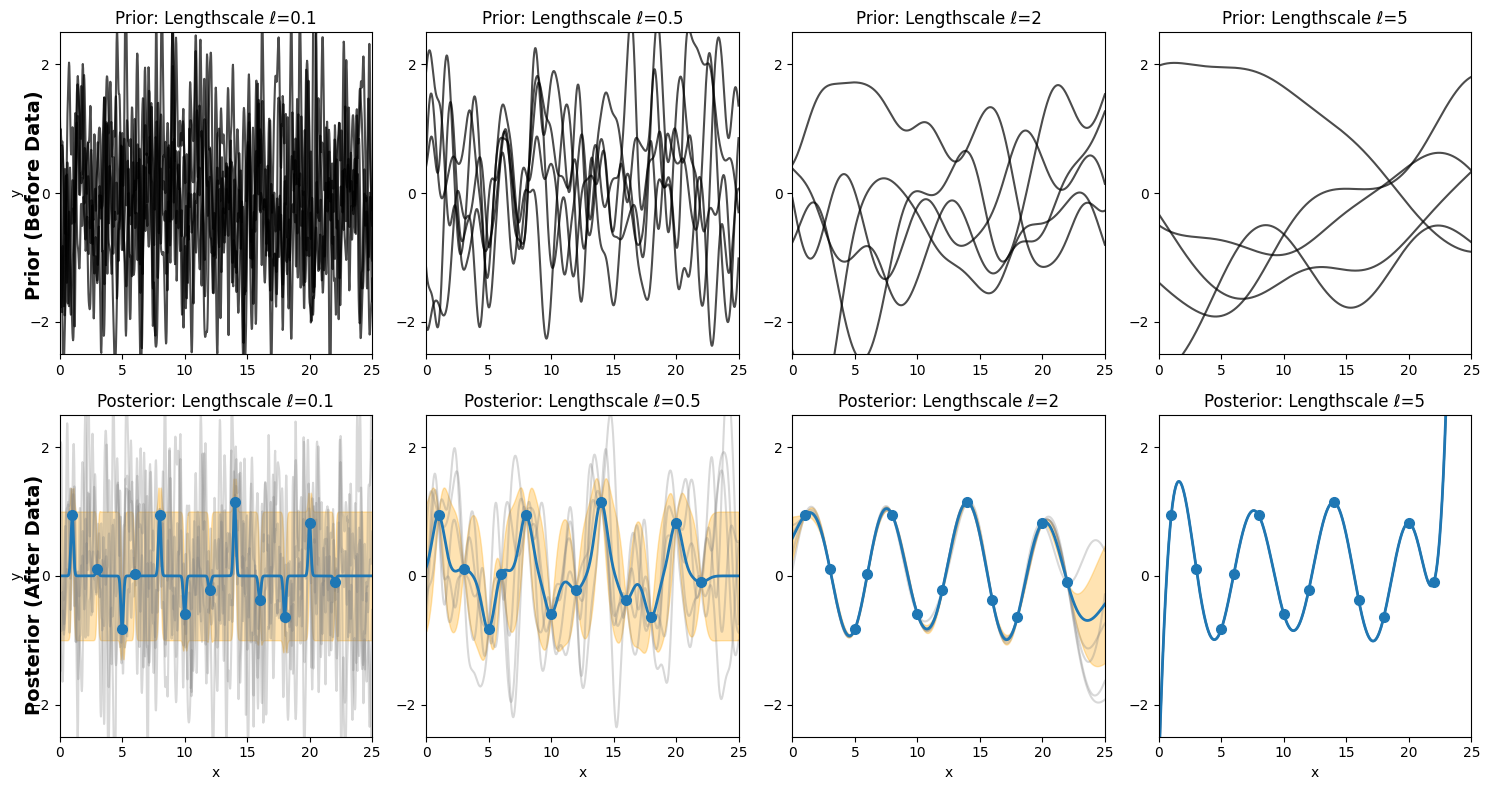

=== Lengthscale Effects ===
ℓ = 0.1: Very short correlation length, very rough functions
ℓ = 0.5: Short correlation length, rough functions
ℓ = 2.0: Medium correlation length, moderate smoothness
ℓ = 5.0: Long correlation length, smooth functions


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(42)

# Training data
X_train = np.array([[1], [3], [5], [6], [8], [10], [12], [14], [16], [18], [20], [22]])
y_train = np.sin(X_train).ravel() + np.random.normal(0, 0.2, X_train.shape[0])

# Test data
X = np.linspace(0, 25, 1000).reshape(-1, 1)

# Lengthscale values to display
lengthscales = [0.1, 0.5, 2, 5]

# Create 2x5 figure (horizontal layout)
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for i, l in enumerate(lengthscales):
    # --- PRIOR: Sample from GP (before fitting data)
    kernel = C(1.0, constant_value_bounds="fixed") * RBF(length_scale=l, length_scale_bounds="fixed")
    gp_prior = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, normalize_y=False)
    y_prior = gp_prior.sample_y(X, 5, random_state=0)
    
    # Plot prior (top row)
    ax_prior = axes[0, i]
    ax_prior.plot(X, y_prior, color='k', alpha=0.7)
    ax_prior.set_title(f'Prior: Lengthscale ℓ={l}')
    ax_prior.set_xlim(0, 25)
    ax_prior.set_ylim(-2.5, 2.5)
    ax_prior.set_yticks([-2, 0, 2])
    if i == 0:
        ax_prior.set_ylabel('y')

    # --- POSTERIOR: Fit with data, plot mean, CI, samples
    gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, normalize_y=False)
    gp.fit(X_train, y_train)
    y_mean, y_std = gp.predict(X, return_std=True)
    y_post = gp.sample_y(X, 5, random_state=0)
    
    # Plot posterior (bottom row)
    ax_post = axes[1, i]
    ax_post.plot(X, y_post, color='gray', alpha=0.3)
    ax_post.plot(X, y_mean, color='C0', linewidth=2)
    ax_post.fill_between(X.flatten(), y_mean - y_std, y_mean + y_std, color='orange', alpha=0.3)
    ax_post.plot(X_train, y_train, 'o', color='C0', markersize=7)
    ax_post.set_title(f'Posterior: Lengthscale ℓ={l}')
    ax_post.set_xlim(0, 25)
    ax_post.set_ylim(-2.5, 2.5)
    ax_post.set_xlabel('x')
    ax_post.set_yticks([-2, 0, 2])
    if i == 0:
        ax_post.set_ylabel('y')

# Add row labels
fig.text(0.02, 0.75, 'Prior (Before Data)', rotation=90, fontsize=14, fontweight='bold', va='center')
fig.text(0.02, 0.25, 'Posterior (After Data)', rotation=90, fontsize=14, fontweight='bold', va='center')

plt.tight_layout()
plt.show()

print("=== Lengthscale Effects ===")
print("ℓ = 0.1: Very short correlation length, very rough functions")
print("ℓ = 0.5: Short correlation length, rough functions")
print("ℓ = 2.0: Medium correlation length, moderate smoothness")
print("ℓ = 5.0: Long correlation length, smooth functions")

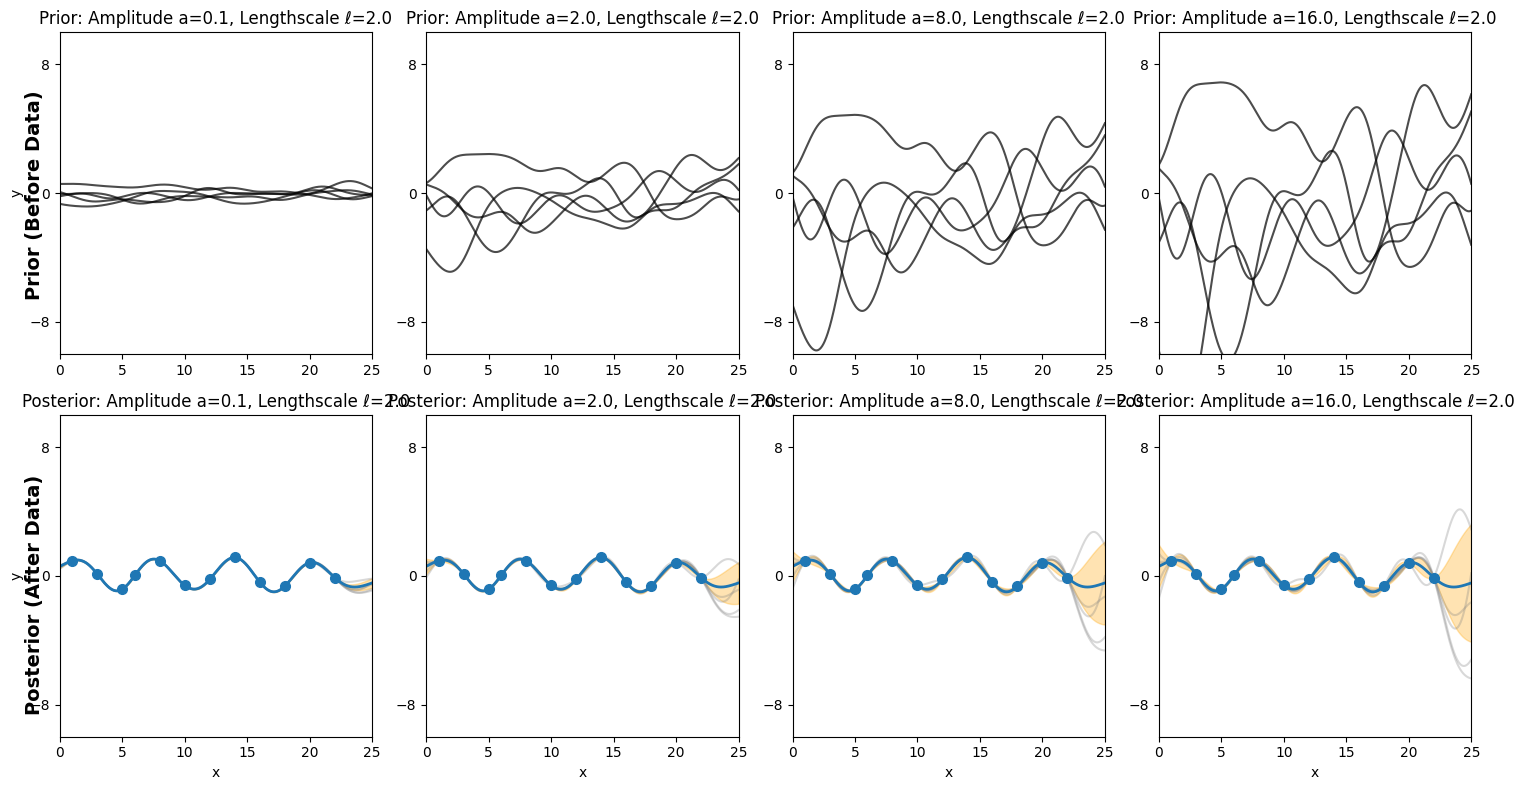

=== Amplitude Effects (Lengthscale ℓ=2.0) ===
a = 0.1: Low amplitude, small variations in function values
a = 2.0: Medium amplitude, moderate variations in function values
a = 8.0: High amplitude, large variations in function values


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(42)

# Training data
X_train = np.array([[1], [3], [5], [6], [8], [10], [12], [14], [16], [18], [20], [22]])
y_train = np.sin(X_train).ravel() + np.random.normal(0, 0.2, X_train.shape[0])

# Test data
X = np.linspace(0, 25, 1000).reshape(-1, 1)

# Amplitude values to display (keeping lengthscale fixed at 2.0)
amplitudes = [0.1, 2.0, 8.0, 16.0]
lengthscale = 2.0

# Create 2x3 figure (horizontal layout)
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for i, a in enumerate(amplitudes):
    # --- PRIOR: Sample from GP (before fitting data)
    kernel = C(a, constant_value_bounds="fixed") * RBF(length_scale=lengthscale, length_scale_bounds="fixed")
    gp_prior = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, normalize_y=False)
    y_prior = gp_prior.sample_y(X, 5, random_state=0)
    
    # Plot prior (top row)
    ax_prior = axes[0, i]
    ax_prior.plot(X, y_prior, color='k', alpha=0.7)
    ax_prior.set_title(f'Prior: Amplitude a={a}, Lengthscale ℓ={lengthscale}')
    ax_prior.set_xlim(0, 25)
    ax_prior.set_ylim(-10, 10)
    ax_prior.set_yticks([-8, 0, 8])
    if i == 0:
        ax_prior.set_ylabel('y')

    # --- POSTERIOR: Fit with data, plot mean, CI, samples
    gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, normalize_y=False)
    gp.fit(X_train, y_train)
    y_mean, y_std = gp.predict(X, return_std=True)
    y_post = gp.sample_y(X, 5, random_state=0)
    
    # Plot posterior (bottom row)
    ax_post = axes[1, i]
    ax_post.plot(X, y_post, color='gray', alpha=0.3)
    ax_post.plot(X, y_mean, color='C0', linewidth=2)
    ax_post.fill_between(X.flatten(), y_mean - y_std, y_mean + y_std, color='orange', alpha=0.3)
    ax_post.plot(X_train, y_train, 'o', color='C0', markersize=7)
    ax_post.set_title(f'Posterior: Amplitude a={a}, Lengthscale ℓ={lengthscale}')
    ax_post.set_xlim(0, 25)
    ax_post.set_ylim(-10, 10)
    ax_post.set_xlabel('x')
    ax_post.set_yticks([-8, 0, 8])
    if i == 0:
        ax_post.set_ylabel('y')

# Add row labels
fig.text(0.02, 0.75, 'Prior (Before Data)', rotation=90, fontsize=14, fontweight='bold', va='center')
fig.text(0.02, 0.25, 'Posterior (After Data)', rotation=90, fontsize=14, fontweight='bold', va='center')

plt.tight_layout()
plt.show()

print("=== Amplitude Effects (Lengthscale ℓ=2.0) ===")
print("a = 0.1: Low amplitude, small variations in function values")
print("a = 2.0: Medium amplitude, moderate variations in function values")
print("a = 8.0: High amplitude, large variations in function values") 
print("a = 16.0: Very high amplitude, very large variations in function values") 

=== Neural Network Kernel GP Demonstration ===
Showing how NN kernels create functions with varying complexity


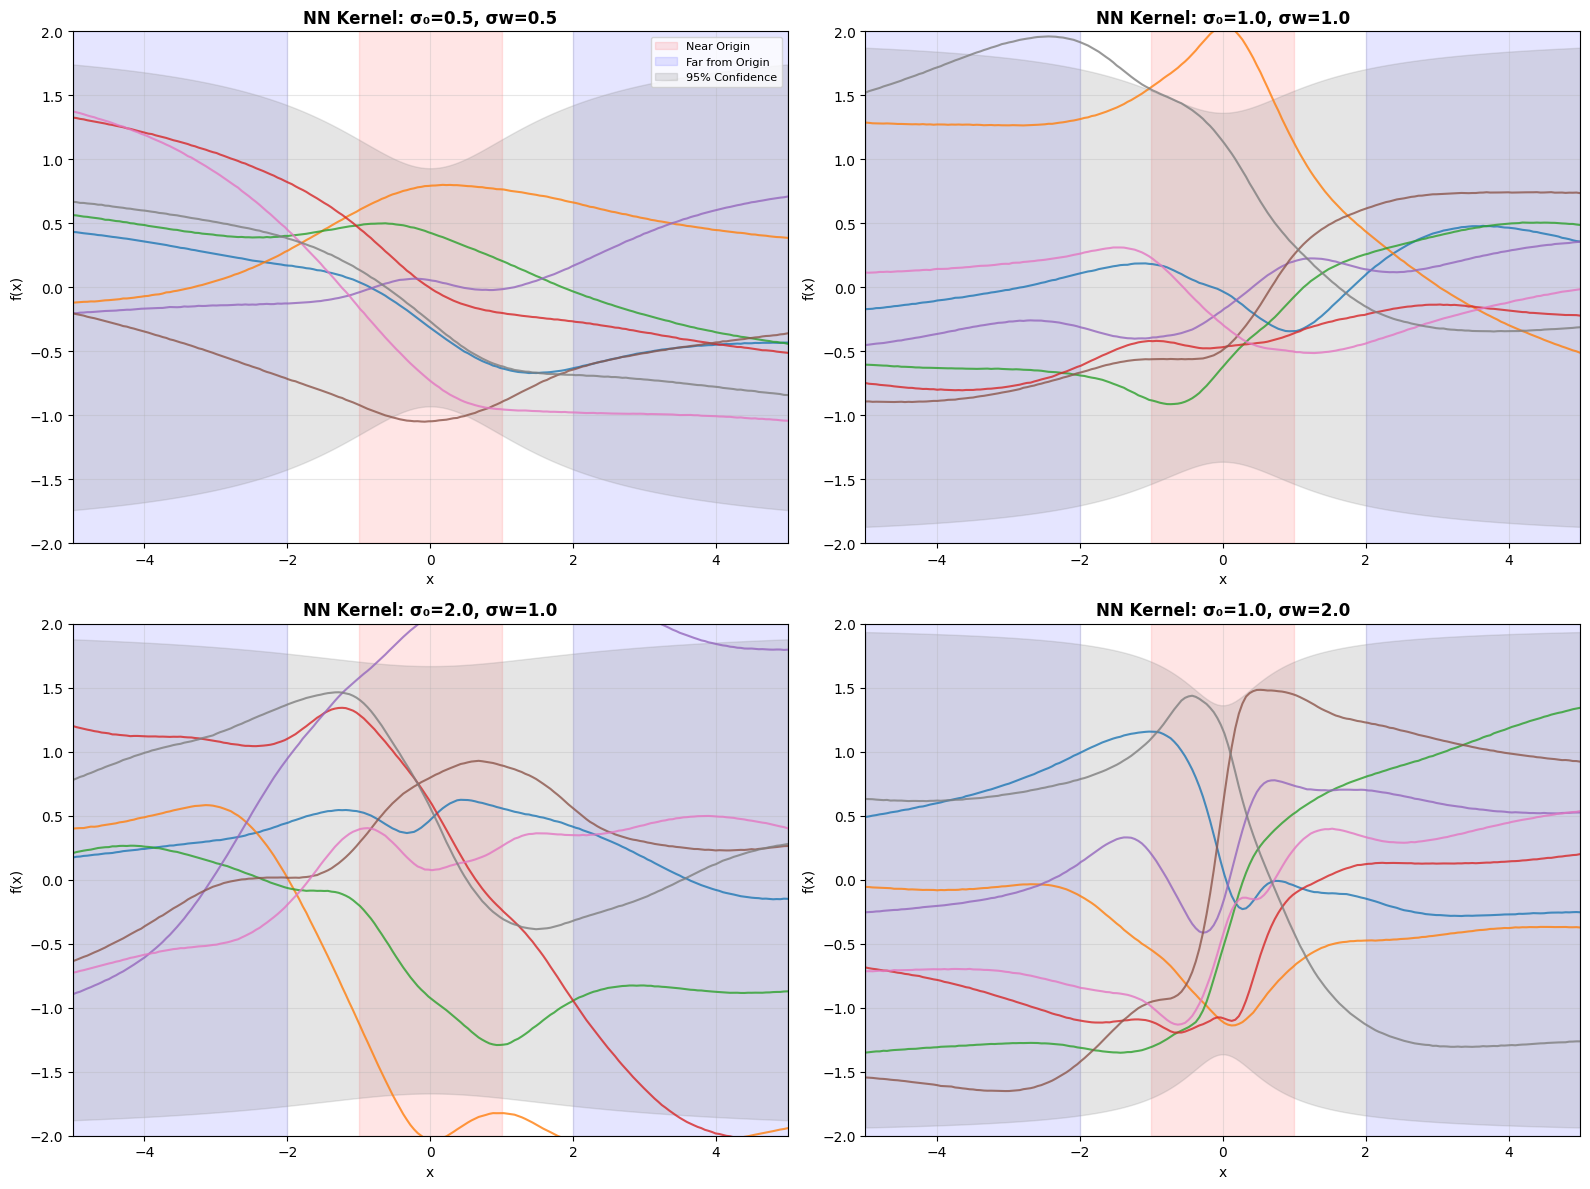


=== Approximate NN Behavior with Standard Kernels ===
Comparing different kernel configurations to show complexity variations


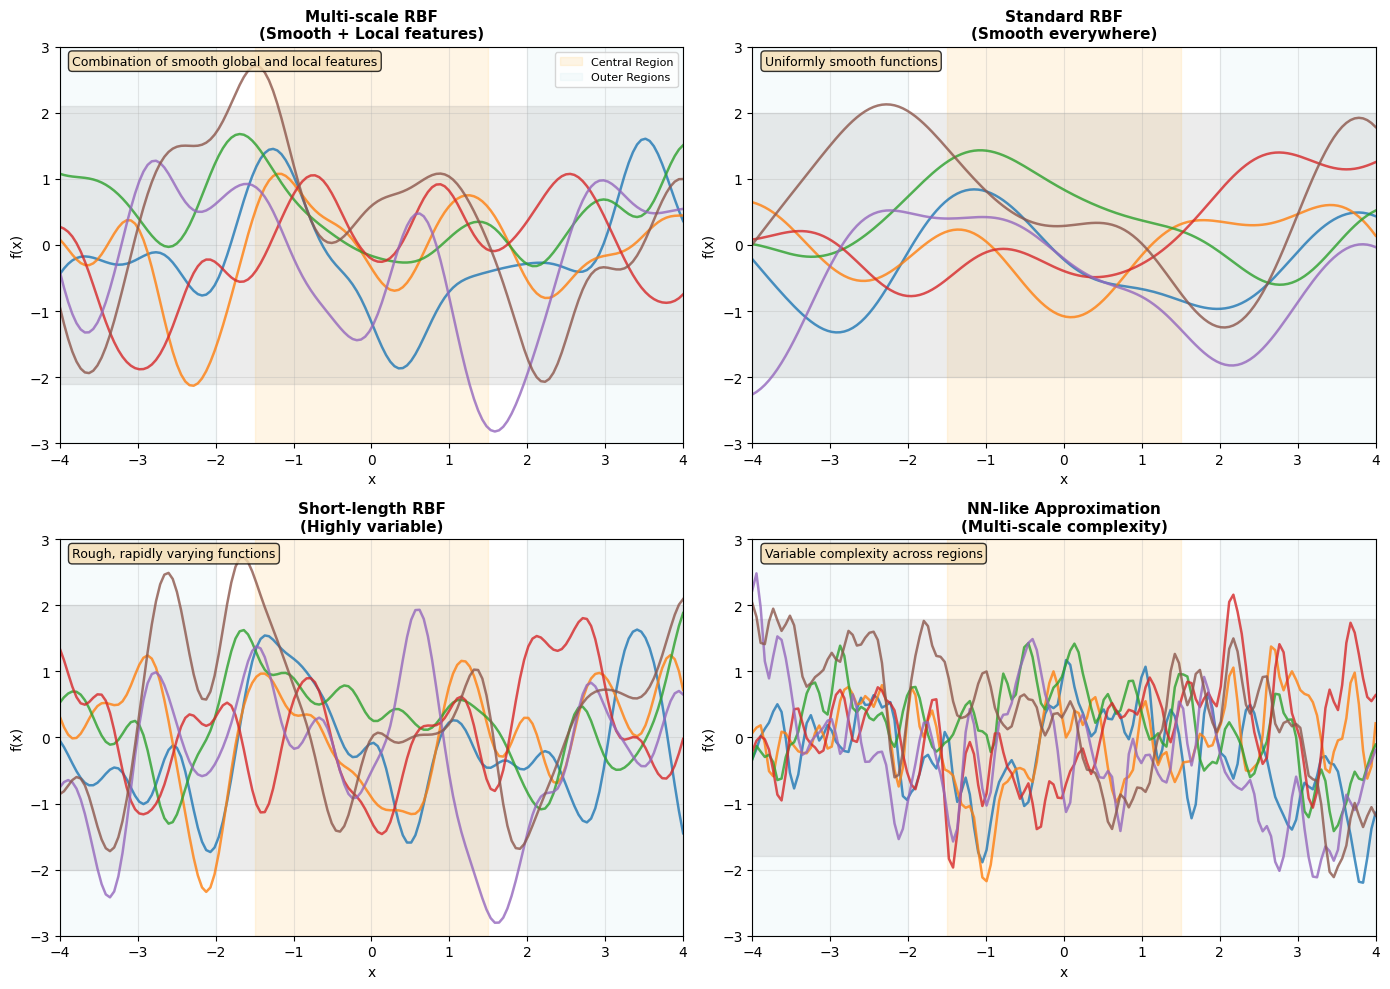


=== Key Observations for Neural Network Kernels ===
1. NEAR ORIGIN (|x| < 1):
   - Functions often smoother due to kernel properties
   - Lower variance in some NN kernel parameterizations
   - Behavior depends on σ₀ (bias variance)

2. FAR FROM ORIGIN (|x| > 2):
   - Functions can become more linear
   - Variance may saturate at limiting value
   - Behavior depends on σw (weight variance)

3. NEURAL NETWORK KERNEL PROPERTIES:
   - Non-stationary: behavior changes with input magnitude
   - Can approximate functions with varying local complexity
   - Parameters control global vs local feature emphasis
   - Natural for modeling neural network function distributions


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.spatial.distance import cdist

# Custom Neural Network Kernel implementation
class NeuralNetworkKernel:
    def __init__(self, sigma_0=1.0, sigma_w=1.0):
        self.sigma_0 = sigma_0  # Bias variance
        self.sigma_w = sigma_w  # Weight variance
    
    def __call__(self, X, Y=None):
        if Y is None:
            Y = X
        
        # Neural Network kernel: K(x,x') = (2/π) * arcsin((2 * σ_w² * x·x' + 2 * σ_0²) / sqrt((2 * σ_w² * x² + 2 * σ_0² + 1)(2 * σ_w² * x'² + 2 * σ_0² + 1)))
        X = np.atleast_2d(X)
        Y = np.atleast_2d(Y)
        
        # For 1D case
        if X.shape[1] == 1 and Y.shape[1] == 1:
            x_vals = X.flatten()
            y_vals = Y.flatten()
            
            K = np.zeros((len(x_vals), len(y_vals)))
            
            for i, x in enumerate(x_vals):
                for j, y in enumerate(y_vals):
                    numerator = 2 * self.sigma_w**2 * x * y + 2 * self.sigma_0**2
                    denominator = np.sqrt((2 * self.sigma_w**2 * x**2 + 2 * self.sigma_0**2 + 1) * 
                                        (2 * self.sigma_w**2 * y**2 + 2 * self.sigma_0**2 + 1))
                    K[i, j] = (2/np.pi) * np.arcsin(np.clip(numerator / denominator, -1, 1))
            
            return K
        else:
            # For higher dimensions (simplified version)
            return np.eye(X.shape[0])
    
    def diag(self, X):
        return np.full(X.shape[0], 2/np.pi)

def neural_network_gp_demo():
    # Set random seed
    np.random.seed(42)
    
    # Define x range - extended to show behavior at different scales
    x_fine = np.linspace(-5, 5, 200).reshape(-1, 1)
    x_coarse = np.linspace(-2, 2, 100).reshape(-1, 1)
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(16, 12))
    
    # Different neural network kernel parameters
    nn_kernels = [
        {'sigma_0': 0.5, 'sigma_w': 0.5, 'title': 'NN Kernel: σ₀=0.5, σw=0.5'},
        {'sigma_0': 1.0, 'sigma_w': 1.0, 'title': 'NN Kernel: σ₀=1.0, σw=1.0'},
        {'sigma_0': 2.0, 'sigma_w': 1.0, 'title': 'NN Kernel: σ₀=2.0, σw=1.0'},
        {'sigma_0': 1.0, 'sigma_w': 2.0, 'title': 'NN Kernel: σ₀=1.0, σw=2.0'}
    ]
    
    for idx, params in enumerate(nn_kernels):
        ax = plt.subplot(2, 2, idx + 1)
        
        # Create NN kernel
        nn_kernel = NeuralNetworkKernel(sigma_0=params['sigma_0'], sigma_w=params['sigma_w'])
        
        # Sample functions using Cholesky decomposition
        n_samples = 8
        K = nn_kernel(x_fine)
        
        # Add small diagonal term for numerical stability
        K += 1e-6 * np.eye(K.shape[0])
        
        try:
            L = np.linalg.cholesky(K)
            # Sample from multivariate normal
            z = np.random.normal(0, 1, (K.shape[0], n_samples))
            y_samples = L @ z
            
            # Plot samples
            for i in range(n_samples):
                ax.plot(x_fine.flatten(), y_samples[:, i], alpha=0.8, linewidth=1.5)
            
            # Highlight different regions
            # Near origin region
            origin_mask = np.abs(x_fine.flatten()) <= 1.0
            ax.axvspan(-1, 1, alpha=0.1, color='red', label='Near Origin')
            
            # Far from origin regions
            ax.axvspan(-5, -2, alpha=0.1, color='blue', label='Far from Origin')
            ax.axvspan(2, 5, alpha=0.1, color='blue')
            
            # Add confidence bounds
            mean_pred = np.zeros_like(x_fine.flatten())
            std_pred = np.sqrt(np.diag(K))
            ax.fill_between(x_fine.flatten(), mean_pred - 2*std_pred, mean_pred + 2*std_pred, 
                          alpha=0.2, color='gray', label='95% Confidence')
            
        except np.linalg.LinAlgError:
            # Fallback if Cholesky fails
            ax.text(0.5, 0.5, 'Kernel not positive definite', transform=ax.transAxes, 
                   ha='center', va='center', fontsize=12)
        
        ax.set_xlim(-5, 5)
        ax.set_ylim(-2, 2)
        ax.set_title(params['title'], fontsize=12, fontweight='bold')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True, alpha=0.3)
        
        if idx == 0:
            ax.legend(loc='upper right', fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Alternative: Approximate NN kernel using composition of simpler kernels
def approximate_nn_gp_demo():
    # Set random seed
    np.random.seed(42)
    
    # Define x range
    x = np.linspace(-4, 4, 150).reshape(-1, 1)
    
    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    # Different kernel setups to approximate NN behavior
    kernel_configs = [
        {
            'kernel': C(1.0) * RBF(length_scale=0.5) + C(0.1) * RBF(length_scale=2.0),
            'title': 'Multi-scale RBF\n(Smooth + Local features)',
            'description': 'Combination of smooth global and local features'
        },
        {
            'kernel': C(1.0) * RBF(length_scale=1.0),
            'title': 'Standard RBF\n(Smooth everywhere)',
            'description': 'Uniformly smooth functions'
        },
        {
            'kernel': C(1.0) * RBF(length_scale=0.3),
            'title': 'Short-length RBF\n(Highly variable)',
            'description': 'Rough, rapidly varying functions'
        },
        {
            'kernel': C(0.5) * RBF(length_scale=0.8) + C(0.3) * RBF(length_scale=0.1),
            'title': 'NN-like Approximation\n(Multi-scale complexity)',
            'description': 'Variable complexity across regions'
        }
    ]
    
    for idx, config in enumerate(kernel_configs):
        ax = axes[idx]
        
        # Create GP with kernel
        gp = GaussianProcessRegressor(kernel=config['kernel'], alpha=1e-10)
        
        # Sample functions
        n_samples = 6
        y_samples = gp.sample_y(x, n_samples, random_state=42)
        
        # Plot samples
        for i in range(n_samples):
            ax.plot(x.flatten(), y_samples[:, i], alpha=0.8, linewidth=1.8)
        
        # Highlight regions
        ax.axvspan(-1.5, 1.5, alpha=0.1, color='orange', label='Central Region')
        ax.axvspan(-4, -2, alpha=0.1, color='lightblue', label='Outer Regions')
        ax.axvspan(2, 4, alpha=0.1, color='lightblue')
        
        # Calculate and show local variability
        y_pred, y_std = gp.predict(x, return_std=True)
        ax.fill_between(x.flatten(), y_pred - 2*y_std, y_pred + 2*y_std, 
                       alpha=0.15, color='gray')
        
        ax.set_xlim(-4, 4)
        ax.set_ylim(-3, 3)
        ax.set_title(config['title'], fontsize=11, fontweight='bold')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True, alpha=0.3)
        
        # Add text description
        ax.text(0.02, 0.98, config['description'], transform=ax.transAxes, 
               fontsize=9, verticalalignment='top', 
               bbox=dict(boxstyle='round,pad=0.3', facecolor='wheat', alpha=0.8))
        
        if idx == 0:
            ax.legend(loc='upper right', fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Run both demonstrations
print("=== Neural Network Kernel GP Demonstration ===")
print("Showing how NN kernels create functions with varying complexity")

# Run the NN kernel demo
neural_network_gp_demo()

print("\n=== Approximate NN Behavior with Standard Kernels ===")
print("Comparing different kernel configurations to show complexity variations")

# Run the approximation demo
approximate_nn_gp_demo()

print("\n=== Key Observations for Neural Network Kernels ===")
print("1. NEAR ORIGIN (|x| < 1):")
print("   - Functions often smoother due to kernel properties")
print("   - Lower variance in some NN kernel parameterizations")
print("   - Behavior depends on σ₀ (bias variance)")

print("\n2. FAR FROM ORIGIN (|x| > 2):")
print("   - Functions can become more linear")
print("   - Variance may saturate at limiting value")
print("   - Behavior depends on σw (weight variance)")

print("\n3. NEURAL NETWORK KERNEL PROPERTIES:")
print("   - Non-stationary: behavior changes with input magnitude")
print("   - Can approximate functions with varying local complexity")
print("   - Parameters control global vs local feature emphasis")
print("   - Natural for modeling neural network function distributions")

d:\HOC_TAP_IMP\Math Foundation\.venv\lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


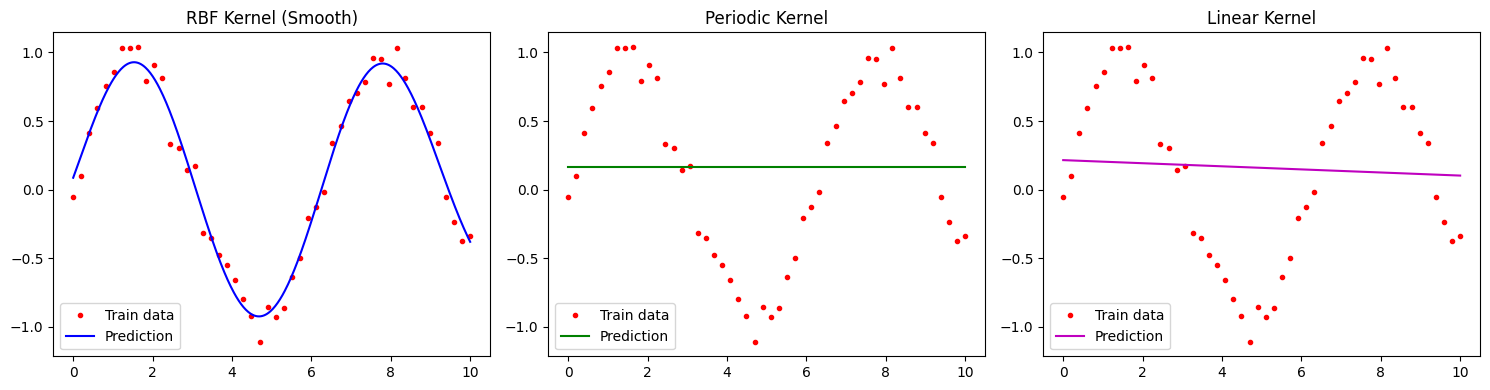

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, DotProduct

# Tạo dữ liệu huấn luyện mẫu
X = np.atleast_2d(np.linspace(0, 10, 50)).T
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Tạo các kernel
rbf_kernel = RBF(length_scale=1.0)
periodic_kernel = ExpSineSquared(length_scale=1.0, periodicity=3.0)
linear_kernel = DotProduct(sigma_0=1.0)

# Tạo các mô hình GP
gp_rbf = GaussianProcessRegressor(kernel=rbf_kernel, alpha=0.1)
gp_per = GaussianProcessRegressor(kernel=periodic_kernel, alpha=0.1)
gp_lin = GaussianProcessRegressor(kernel=linear_kernel, alpha=0.1)

# Fit dữ liệu
gp_rbf.fit(X, y)
gp_per.fit(X, y)
gp_lin.fit(X, y)

# Dự đoán
X_test = np.linspace(0, 10, 500).reshape(-1, 1)
y_rbf, _ = gp_rbf.predict(X_test, return_std=True)
y_per, _ = gp_per.predict(X_test, return_std=True)
y_lin, _ = gp_lin.predict(X_test, return_std=True)

# Vẽ kết quả
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title("RBF Kernel (Smooth)")
plt.plot(X, y, 'r.', label='Train data')
plt.plot(X_test, y_rbf, 'b-', label='Prediction')
plt.legend()

plt.subplot(1, 3, 2)
plt.title("Periodic Kernel")
plt.plot(X, y, 'r.', label='Train data')
plt.plot(X_test, y_per, 'g-', label='Prediction')
plt.legend()

plt.subplot(1, 3, 3)
plt.title("Linear Kernel")
plt.plot(X, y, 'r.', label='Train data')
plt.plot(X_test, y_lin, 'm-', label='Prediction')
plt.legend()

plt.tight_layout()
plt.show()
